In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris 

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df['target'] = iris.target

In [15]:
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [70]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df.drop(['target'], axis = 1), df.target, test_size = 0.2)

In [78]:
len(X_train)

120

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [73]:
model.score(X_test, y_test)

1.0

In [74]:
y_pre = model.predict(X_test)
y_pre

array([0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 2, 0, 0])

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

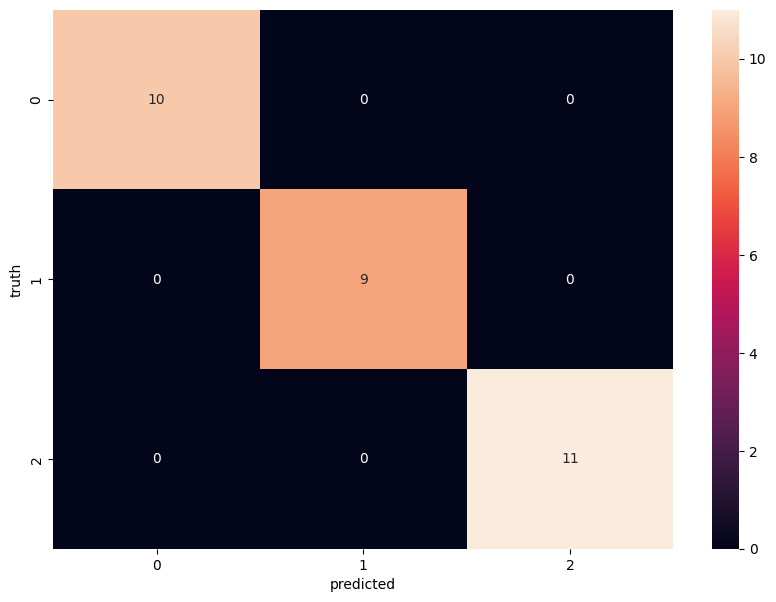

In [76]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')